In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering, DBSCAN

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/housing.csv', delimiter=',')
df.head()

X = df.loc[:, ['Latitude', 'Longitude', 'MedHouseVal']]
X

,Latitude,Longitude,MedHouseVal
0,37.88,-122.23,4.526
1,37.86,-122.22,3.585
2,37.85,-122.24,3.521
3,37.85,-122.25,3.413
4,37.85,-122.25,3.422
...,...,...,...
20635,39.48,-121.09,0.781
20636,39.49,-121.21,0.771
20637,39.43,-121.22,0.923
20638,39.43,-121.32,0.847


<Axes: xlabel='Latitude', ylabel='Longitude'>

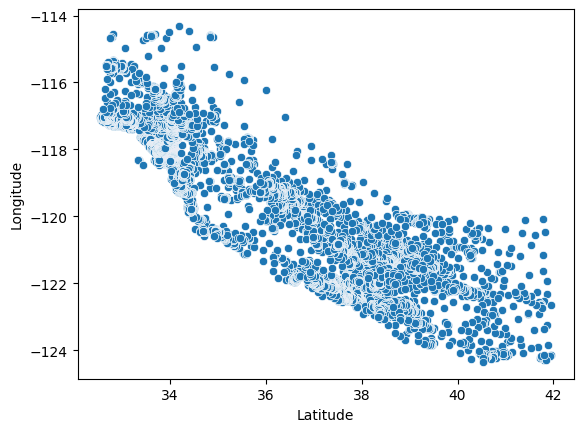

In [3]:
sns.scatterplot(X, x='Latitude', y='Longitude')

<Axes: xlabel='Latitude', ylabel='Longitude'>

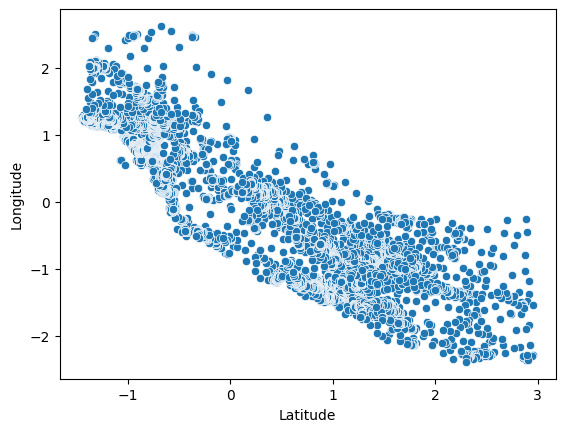

In [4]:
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
sns.scatterplot(X, x='Latitude', y='Longitude')

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(X.loc[:, ['Latitude', 'Longitude']])

KMeans(n_clusters=3)

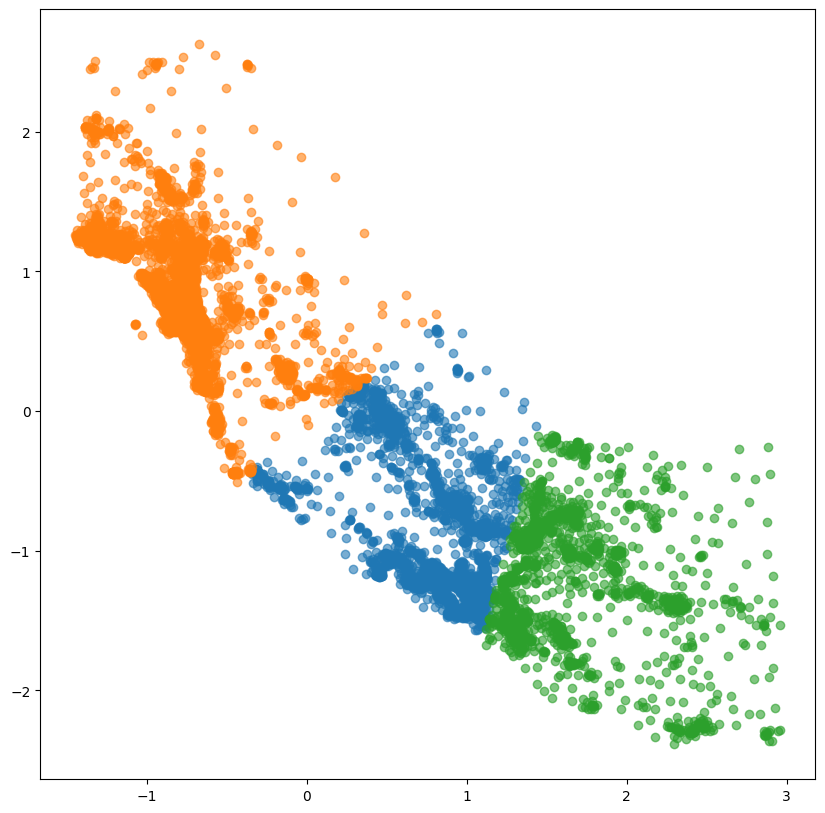

In [6]:
plt.figure(figsize=(10, 10))
labels = km.labels_
for cluster in np.unique(km.labels_):
    cluster_points = X[labels == cluster]
    plt.scatter(cluster_points.loc[:, ['Latitude']], cluster_points.loc[:, ['Longitude']], label=f'Cluster {cluster}', alpha=0.6)

In [7]:
labels = km.labels_
for cluster in np.unique(km.labels_):
    X_cluster = X[cluster == labels]
    print(f"Variance of cluster({cluster}) = {np.sum(np.var(X_cluster))}")
    

Variance of cluster(0) = 1.4531470977084615
Variance of cluster(1) = 1.16199184119645
Variance of cluster(2) = 0.6922045191977877


Hierarchical clustering


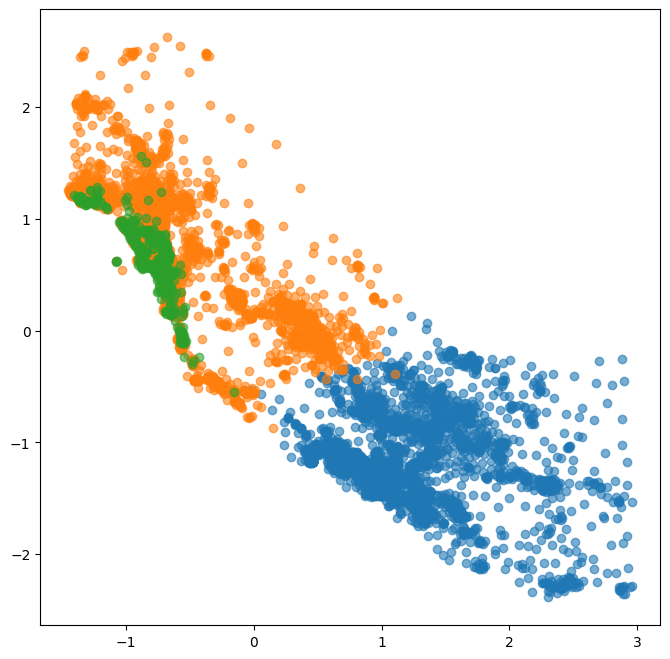

In [16]:
hc = AgglomerativeClustering(n_clusters=3, linkage='average')
hc.fit(X)
plt.figure(figsize=(8, 8))
labels = hc.labels_
for cluster in np.unique(hc.labels_):
    cluster_points = X[labels == cluster]
    plt.scatter(cluster_points.loc[:, ['Latitude']], cluster_points.loc[:, ['Longitude']], label=f'Cluster {cluster}', alpha=0.6)

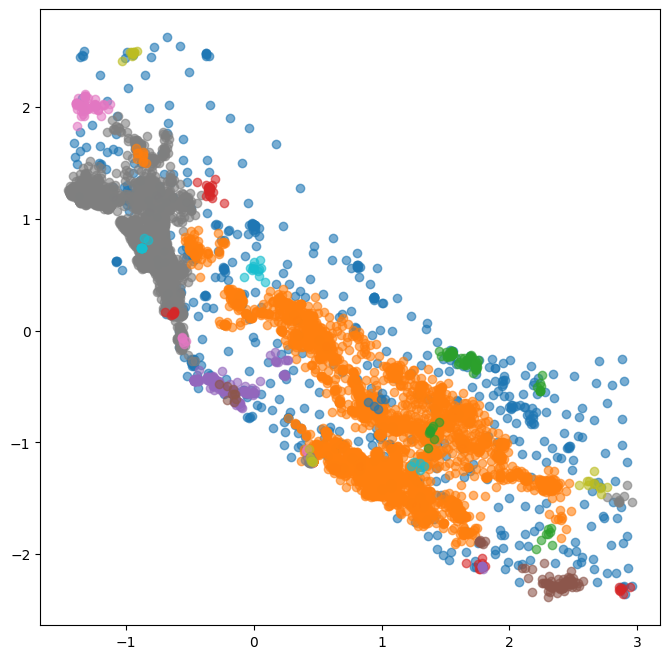

In [21]:
hc = DBSCAN(eps=0.12)
hc.fit(X)
plt.figure(figsize=(8, 8))
labels = hc.labels_
for cluster in np.unique(hc.labels_):
    cluster_points = X[labels == cluster]
    plt.scatter(cluster_points.loc[:, ['Latitude']], cluster_points.loc[:, ['Longitude']], label=f'Cluster {cluster}', alpha=0.6)